# Generate Occupancy Grid
Generating occupancy grid using DL models and transformations. 

In [1]:
import numpy as np
import sys
import cv2
sys.path.insert(1, './models/PSMNet')
from generate_disparity import generate_disparity 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

load PSMNet
Number of model parameters: 5224768


## Including the Detectron 2

In [2]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

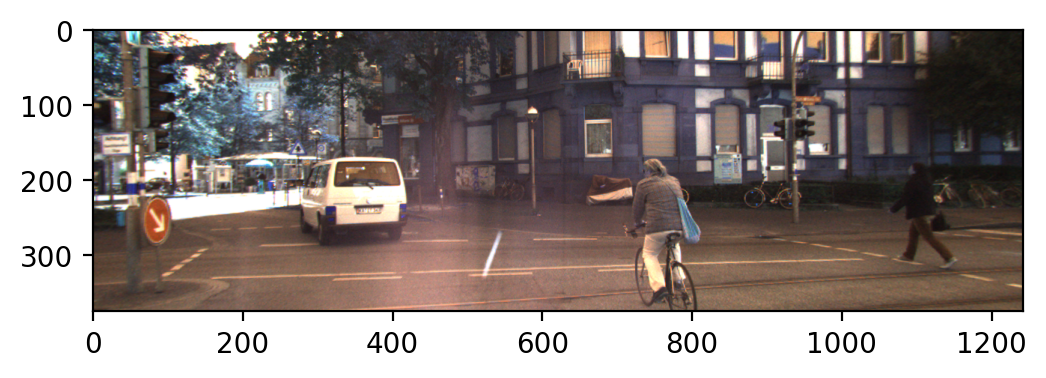

In [3]:
left = cv2.imread('./inputs/left.png')
right = cv2.imread('./inputs/right.png')
plt.imshow(right)

In [4]:

img = generate_disparity('inputs/left.png', 'inputs/right.png', False)
print(img)

/home/mohammad.nomaan/env/lib/python3.6/site-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/mohammad.nomaan/env/lib/python3.6/site-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/home/mohammad.nomaan/env/lib/python3.6/site-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=trilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for detail

time = 0.43
[[ 6035  6035  5938 ...  5506  5647  5952]
 [ 6692  6692  6535 ...  5619  6278  8538]
 [ 7333  7333  7098 ...  5611  7367 16909]
 ...
 [15794 15794 15792 ... 17063 17099 17179]
 [15833 15833 15831 ... 17121 17158 17234]
 [15833 15833 15831 ... 17121 17158 17234]]


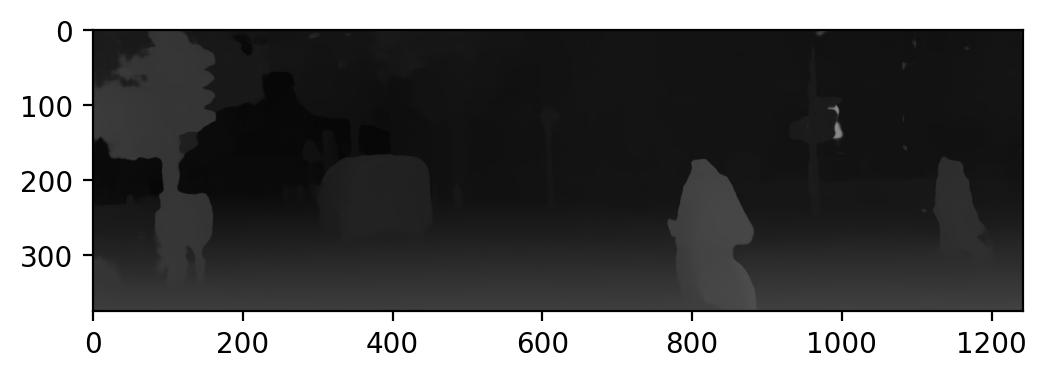

In [5]:
disparity = cv2.imread('./disparity.png')
plt.imshow(disparity)

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


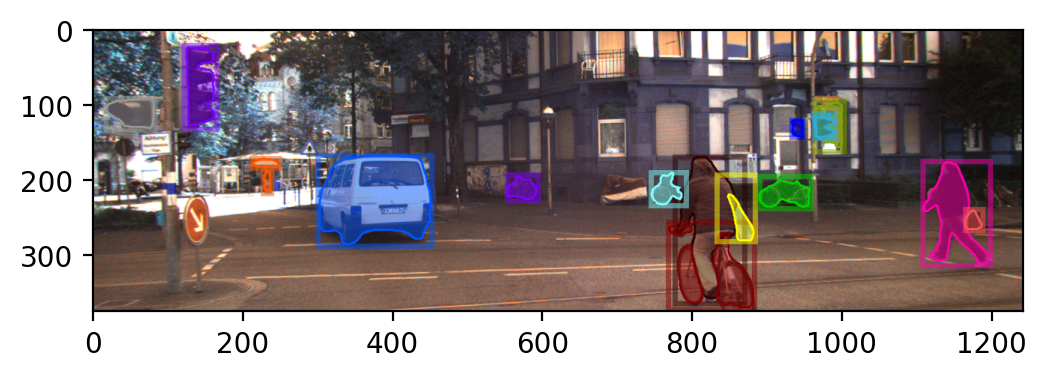

In [6]:
im = cv2.imread('./inputs/left.png')
outputs = predictor(im)

x =  MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
for y in range(len(x.thing_classes)) :
    x.thing_classes[y] = ''
    

outputs["instances"].scores =['' for x in range(16)]
print(outputs["instances"].scores)



v = Visualizer(im[:, :, ::-1], x, scale=1.0)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"), False)
cv2.imwrite('outputs/instance_segmentation/output.jpg',v.get_image()[:, :, ::-1])
plt.imshow(v.get_image()[:, :, ::-1])